   # Đồ án cuối kì LTKHDL 
   
   

|MSSV|Họ và tên|Github|
|-----|-----------|----------|
|1712778|Thống A Thảo|ThaoThong21|
|19120586|Nguyễn Phát Minh|InventN|

### import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Thu thập dữ liệu
Dữ liệu về các ứng dụng của __googleplay store__ trên __kaggle__ [link](https://www.kaggle.com/lava18/google-play-store-apps?select=googleplaystore.csv) theo mô tả

>Web scraped data of 10k Play Store apps for analysing the Android market.
>
>Each app (row) has values for catergory, rating, size, and more.
>
>The Play Store apps data has enormous potential to drive app-making businesses to success Actionable insights can be drawn for developers to work on and capture the Android market!.

__Author__ :
Lavanya
Kaggle Contributor

Gurugram, Haryana

CS Grad (Language Technologies)

__License__ : 
>This work is licensed under the Creative Commons Attribution 3.0 Unported License. To view a copy of this license, visit http://creativecommons.org/licenses/by/3.0/.

__Cách lấy dữ liệu__ :
>While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

Ở đây chúng em làm chủ yếu theo file "googleplaystore.csv"


In [2]:
googleplaystore_df = pd.read_csv('googleplaystore.csv')
googleplaystore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## 2. Khám phá dữ liệu

### Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [3]:
num_rows = googleplaystore_df.shape[0]
num_cols = googleplaystore_df.shape[1]
print(num_rows, num_cols)

10841 13


### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Kiểm tra xem cột App có dữ liệu trùng không

In [4]:
googleplaystore_df['App'].nunique()

9660

có 9660 app trong khi lại có 10841 dòng chứng tỏ có giá trị lặp. Giờ ta sẽ tìm hiểu tại sao bị lặp

In [5]:
googleplaystore_df[googleplaystore_df.duplicated('App', keep=False)].sort_values(['App'], ascending=[True]).head(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8M,"1,000+",Paid,$16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up
2256,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8M,"1,000+",Paid,$16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up
1337,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506,15M,"100,000+",Free,0,Everyone,Health & Fitness,"August 2, 2018",3.0.0,4.1 and up
1434,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506,15M,"100,000+",Free,0,Everyone,Health & Fitness,"August 2, 2018",3.0.0,4.1 and up
3083,365Scores - Live Scores,SPORTS,4.6,666521,25M,"10,000,000+",Free,0,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up
5415,365Scores - Live Scores,SPORTS,4.6,666246,25M,"10,000,000+",Free,0,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up


Các dòng trùng tên đa số không thay đổi gì khác ngoài thuộc tính 'Reviews' và ta cũng thấy được là dòng đầu tiên sẽ có số review cao nhất nên ta chỉ cần giữ lại dòng đầu tiên

### Dữ liệu có các dòng bị lặp không?

In [6]:
num_duplicated_rows = (googleplaystore_df.index.duplicated() == True).sum()
num_duplicated_rows

0

Các dòng vì có số ID khác nhau nên việc trùng tên sẽ không bị phát hiện

In [7]:
googleplaystore_df[googleplaystore_df.duplicated(subset=['App'])].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up


Giờ ta sẽ loại bỏ các dòng trùng tên

In [8]:
googleplaystore_df = googleplaystore_df.drop_duplicates(subset=['App'], keep = 'first')

Cập nhật lại __num_rows__ và __num_cols__

In [9]:
num_rows = googleplaystore_df.shape[0]
num_cols = googleplaystore_df.shape[1]
print(num_rows, num_cols)

9660 13


### Mỗi cột có ý nghĩa gì?

In [10]:
pd.set_option("max_colwidth", 999)
col_meaning_df = pd.read_csv('col_explain.csv',index_col ='Col')
col_meaning_df

,Meaning
Col,
App,Application name
Category,Category the app belongs to
Rating,Overall user rating of the app (as when scraped)
Reviews,Number of user reviews for the app (as when scraped)
Size,Size of the app (as when scraped)
Installs,Number of user downloads/installs for the app (as when scraped)
Type,Paid or Free
Price,Price of the app (as when scraped)
Content Rating,Age group the app is targeted at - Children / Mature 21+ / Adult


### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [11]:
dtypes = googleplaystore_df.dtypes
dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [12]:
googleplaystore_df['Reviews'].head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: object

 - Cột này nên chuyển sang dạng số

In [13]:
googleplaystore_df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

 - Cột này sẽ chuyển theo đơn vị kb

In [14]:
googleplaystore_df['Installs'].head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

 - Nhìn sơ ta thấy cột này lưu bằng kiểu trên một con số chứ không phải một số cụ thể nên muốn chuyển qua dạng số cần sửa lại thông tin bằng cách bỏ dấu __'+'__

In [15]:
googleplaystore_df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

 - Cột này phát hiện một giá trị kị lạ là __'Everyone'__ nên ta sẽ kiểm tra dòng này bị gì

In [16]:
googleplaystore_df.loc[googleplaystore_df['Price'] == 'Everyone']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


- Ta phát hiện dòng này bị thụt 1 cột, nên sẽ ưu tiên xóa dòng này đi rồi mới chuyển các cột khác sang dạng số

In [17]:
googleplaystore_df['Last Updated'].head()

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object

 - Cột này nên chuyển về datetime

---

## Tiền xử lý

- Trước tiên sẽ xóa dòng bị lỗi trước

In [18]:
googleplaystore_df = googleplaystore_df.drop(googleplaystore_df.index[googleplaystore_df['Price'] == 'Everyone'], axis = 0)

 - Chuyển cột __'Size'__

Các giá trị 'Varies with device' sẽ được thay bằng __mean__

In [19]:
googleplaystore_df['Size'] = googleplaystore_df['Size'].apply(lambda x: x.replace('Varies with device', '0'))
googleplaystore_df['Size'] = googleplaystore_df['Size'].apply(lambda x: x.replace('k', ''))
googleplaystore_df['Size'] = googleplaystore_df['Size'].apply(lambda x: (float(x.replace('M', ''))*1024) if 'M' in x else x)
googleplaystore_df['Size'] = pd.to_numeric(googleplaystore_df.Size)
mean_temp = googleplaystore_df['Size'].loc[googleplaystore_df['Size'] != 0].mean()
googleplaystore_df['Size'] = googleplaystore_df['Size'].apply(lambda x: mean_temp if x == 0 else x)
googleplaystore_df['Size'] = googleplaystore_df['Size'].apply(lambda x: round(x, 1))
googleplaystore_df['Size'].head()

0    19456.0
1    14336.0
2     8908.8
3    25600.0
4     2867.2
Name: Size, dtype: float64

 - Chuyển cột __'installs'__

In [20]:
googleplaystore_df['Installs'] = googleplaystore_df['Installs'].apply(lambda x: x.replace('+', ''))
googleplaystore_df['Installs'] = googleplaystore_df['Installs'].apply(lambda x: x.replace(',', ''))
googleplaystore_df['Installs'] = pd.to_numeric(googleplaystore_df.Installs)
googleplaystore_df['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0],
      dtype=int64)

 - Chuyển cột __'Price'__

In [21]:
googleplaystore_df['Price'] = googleplaystore_df['Price'].apply(lambda x: x.replace('$', ''))
googleplaystore_df['Price'] = pd.to_numeric(googleplaystore_df.Price)
googleplaystore_df['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

 - Chuyển cột __'Last Updated'__

In [22]:
googleplaystore_df['Last Updated'] = pd.to_datetime(googleplaystore_df['Last Updated'])
googleplaystore_df['Last Updated'].head

<bound method NDFrame.head of 0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 9659, dtype: datetime64[ns]>

### Với mỗi cột có kiểu dữ liệu dạng số (numeric) và dạng datetime, các giá trị được phân bố như thế nào?

 - Cột dạng số

In [23]:
numeric_col = googleplaystore_df.select_dtypes(include=np.number)
numeric_col

,Rating,Size,Installs,Price
0,4.1,19456.0,10000,0.0
1,3.9,14336.0,500000,0.0
2,4.7,8908.8,5000000,0.0
3,4.5,25600.0,50000000,0.0
4,4.3,2867.2,100000,0.0
...,...,...,...,...
10836,4.5,54272.0,5000,0.0
10837,5.0,3686.4,100,0.0
10838,NaN,9728.0,1000,0.0
10839,4.5,20884.4,1000,0.0


In [24]:
percent_missing = numeric_col.isnull().sum() * 100 / len(numeric_col)
numeric_val = percent_missing, numeric_col.min(), numeric_col.max(), numeric_col.mean()
Hmm = pd.DataFrame(numeric_val, index = ['missing_percent', 'min', 'max', 'mean'])
Hmm

,Rating,Size,Installs,Price
missing_percent,15.146495,0.00000,0.000000e+00,0.000000
min,1.000000,8.50000,0.000000e+00,0.000000
max,5.000000,102400.00000,1.000000e+09,400.000000
mean,4.173243,20884.37742,7.777507e+06,1.099299


Ở cột __'Rating'__ bị thiếu khoảng 15% nên ta sẽ tìm hiểu lí do 

In [25]:
# googleplaystore_df.loc[googleplaystore_df['Rating'] == np.nan]
googleplaystore_df[googleplaystore_df['Rating'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7168.0,100000,Free,0.0,Everyone,Art & Design;Action & Adventure,2018-03-07,1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5836.8,100000,Free,0.0,Everyone 10+,Beauty,2017-09-20,8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3788.8,50000,Free,0.0,Everyone,Beauty,2018-07-23,1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7577.6,100000,Free,0.0,Teen,Beauty,2018-07-17,1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2969.6,10000,Free,0.0,Mature 17+,Beauty,2017-08-08,2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,83968.0,10000,Free,0.0,Everyone,Medical,2018-07-31,2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7884.8,100,Free,0.0,Teen,Social,2018-02-02,1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,10035.2,5000,Free,0.0,Everyone,Maps & Navigation,2018-06-13,2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9830.4,10,Free,0.0,Everyone,Business,2016-09-29,1.1.5,4.0 and up


Dựa vào dữ liệu thì ta có thể thấy __'Rating'__ bị bỏ trống vì review và install của app này khá ít so với các app khác nên có thể đoán là app được design khá tệ về nội dung cũng như phần đánh giá nên có thể xem như không ai rating.

 - Cột dạng datetime

In [26]:
datetime_col = googleplaystore_df.select_dtypes(include=['datetime64'])
datetime_col

,Last Updated
0,2018-01-07
1,2018-01-15
2,2018-08-01
3,2018-06-08
4,2018-06-20
...,...
10836,2017-07-25
10837,2018-07-06
10838,2017-01-20
10839,2015-01-19


In [27]:
percent_missing = datetime_col.isnull().sum() * 100 / len(numeric_col)
datetime_val = datetime_col.min(), datetime_col.max()
Hmm = pd.DataFrame(percent_missing, columns = ['missing_percent'])
Hmm

,missing_percent
Last Updated,0.0


In [28]:
Hmm = pd.DataFrame(datetime_val, index = ['min', 'max'])
Hmm

,Last Updated
min,2010-05-21
max,2018-08-08


### Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?

In [29]:
def missing_percent(col):
    return col.isna().mean() * 100

def num_diff_vals(col):
    return col.nunique()

def diff_vals(col):
    return col.dropna().unique()
col_name = ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']
Hmm = googleplaystore_df[col_name].agg([missing_percent, num_diff_vals, diff_vals])
pd.set_option("max_colwidth", 100)
Hmm

,App,Category,Type,Content Rating,Genres,Current Ver,Android Ver
missing_percent,0.0,0.0,0.010353,0.0,0.0,0.082824,0.020706
num_diff_vals,9659,33,2,6,118,2817,33
diff_vals,"[Photo Editor & Candy Camera & Grid & ScrapBook, Coloring book moana, U Launcher Lite – FREE Liv...","[ART_AND_DESIGN, AUTO_AND_VEHICLES, BEAUTY, BOOKS_AND_REFERENCE, BUSINESS, COMICS, COMMUNICATION...","[Free, Paid]","[Everyone, Teen, Everyone 10+, Mature 17+, Adults only 18+, Unrated]","[Art & Design, Art & Design;Pretend Play, Art & Design;Creativity, Art & Design;Action & Adventu...","[1.0.0, 2.0.0, 1.2.4, Varies with device, 1.1, 1.0, 6.1.61.1, 2.9.2, 2.8, 1.0.4, 1.0.15, 3.8, 1....","[4.0.3 and up, 4.2 and up, 4.4 and up, 2.3 and up, 3.0 and up, 4.1 and up, 4.0 and up, 2.3.3 and..."


## Đưa ra các câu hỏi có ý nghĩa cần trả lời

## 1 : Tìm các Genres phổ biến

## 2 : 

## Tiền xử lý + phân tích dữ liệu để trả lời cho từng câu hỏi

### 1 : Tìm các Genres phổ biến ở từng lứa tuổi

In [30]:
Genres_rate = googleplaystore_df['Genres'].unique()

In [31]:
Install_count = []
for person in Genres_rate:
    Install_count.append(googleplaystore_df[googleplaystore_df['Genres'] == person]['Installs'].sum())

In [32]:
Genres_intstall = pd.DataFrame(data = Install_count, index = Genres_rate)
Genres_intstall = Genres_intstall.rename(columns = {0 : 'Install_count'})
Genres_intstall

,Install_count
Art & Design,112528100
Art & Design;Pretend Play,500000
Art & Design;Creativity,1710000
Art & Design;Action & Adventure,100000
Auto & Vehicles,53130211
...,...
Role Playing;Brain Games,10000000
Strategy;Education,500000
Racing;Pretend Play,1000000
Communication;Creativity,500000


Giờ ta sẽ tìm 20 genres cao nhất

In [37]:
Gen_in_graph = Genres_intstall.nlargest(20, columns = 'Install_count')

Ý nghĩa câu hỏi : Giúp ta biết được trend của người dùng, từ đó phần nào giúp định hướng cách tạo ra 1 app có nhiều lượt tải về

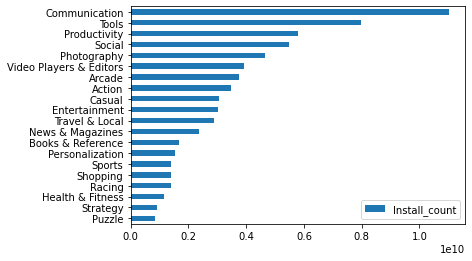

In [36]:
ax = Gen_in_graph.plot.barh()  # or df.plot(), or similar
ax.invert_yaxis()